# Compiled Scripts for Text Feature Extraction


> _Click 'Run All' to extract the text features of a text file._


***

#### Import necessary libraries

In [17]:
import os
from os import path

import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.probability import FreqDist
import string
import syllables
import csv
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

nltk.download('punkt')

UsageError: Line magic function `%` not found.


***

### Input Filename

In [18]:
path = os.getcwd() + "/clean-txt/"      # gets path to 'clean-txt' directory
filename = input("Input filename (must be in the clean-txt folder): ")

### Word Counter

In [19]:
file = open(path + filename, "rt")
data = file.read()
words = data.split()

print("Number of Words: ", len(words))

FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\Alia\\Documents\\school\\THESIS\\Readability-Level-Identifier/clean-txt/Ang Akalatang Pusa_cleaned.txt'

### Sentence Counter

In [ ]:
folder = nltk.data.find(path)
corpusReader = nltk.corpus.PlaintextCorpusReader(folder, filename)

print("Number of Sentences: ", len(corpusReader.sents()))

Number of Sentences:  85


### Average Word Length

In [ ]:
with open(path + "/" + filename, 'r') as file:
    word_length = [len(word) for line in file for word in line.rstrip().split(" ")]
    word_avg = sum(word_length)/len(word_length)
    
print("Average Word Length: ", word_avg, "letters")

Average Word Length:  5.216380182002022 letters


### Average Sentence Length

In [ ]:
folder = nltk.data.find(path)
corpusReader = nltk.corpus.PlaintextCorpusReader(folder, filename)

# SOURCE: https://stackoverflow.com/questions/35900029/average-sentence-length-for-every-text-in-corpus-python3-nltk
avg = sum(len(sent) for sent in corpusReader.sents()) / len(corpusReader.sents())
print("Average Sentence Length: ", avg, "words")

Average Sentence Length:  13.823529411764707 words


### Total Syllables

In [ ]:
# https://github.com/itudidyay/Tagalog-Word-Syllabization-Python
# https://pypi.org/project/syllables/

vowels = 'aeiou'
consonants = 'bcdfghjklmnpqrstvwxyz'

total_syllables = 0

def count_syllables(text):
    global total_syllables
    tokens = word_tokenize(text)

    for token in tokens:
        for char in token:
            if char in vowels:
                total_syllables += 1
        
        # edge cases
        if token == 'ng' or token == 'mga': # edge case ng, mga
            total_syllables += 1
        
        elif (('io') in token): # edge case -io in names/surnames
            total_syllables -= 1

    return total_syllables

def main():

    # Read the text file
    with open(os.path.join(path, filename), 'r', encoding='utf-8') as file:
        text = file.read()

    total_syllables = count_syllables(text)

    print(f"Total syllables in the text file: {total_syllables}")

if __name__ == "__main__":
    main()

Total syllables in the text file: 2096


### Word Frequency

> _Outputs will be placed in the 'word-freq output' folder

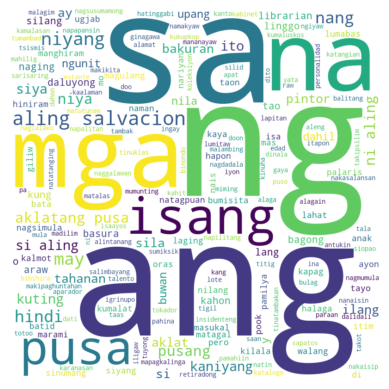

In [ ]:

# Read the text file
with open(os.path.join(path, filename), 'r', encoding='utf-8') as file:
    text = file.read()

temp_tokens = word_tokenize(text)
text_tokens = [word for word in temp_tokens if word.isalnum()] # removes punctuation marks
fdist = FreqDist(text_tokens)

# Create a DataFrame from the frequency distribution
df_fdist = pd.DataFrame.from_dict(fdist, orient='index', columns=['Frequency'])
df_fdist.index.name = 'Word'

# Sort the DataFrame by frequency in descending order
df_fdist_sorted = df_fdist.sort_values(by='Frequency', ascending=False)

#print(df_fdist_sorted)

out_path = os.getcwd() + "/word-freq output"
out_filename = "[wordfreq] " + filename.removesuffix('_cleaned.txt') + ".csv"
df_fdist_sorted.to_csv(os.path.join(out_path, out_filename), encoding='utf-8')

#load in the dataframe
df = pd.read_csv(os.path.join(out_path, out_filename), index_col=0)
df.head(500)

wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10)
wordcloud.generate(' '.join(text_tokens))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

wordcloud.to_file(out_path + "/wordcloud/" + filename.removesuffix('_cleaned.txt') + ".png")
